In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn as skl
import pdb

# Import Data

In [31]:
train_df = pd.read_table(
    'data-IP/adult.data',sep = ',',
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        na_values="?")
#train_df.head()
test_df = pd.read_table('data-IP/adult.test',sep = ',',
        names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        engine='python',
        skiprows=[0],
        na_values="?")
#test_df.head()

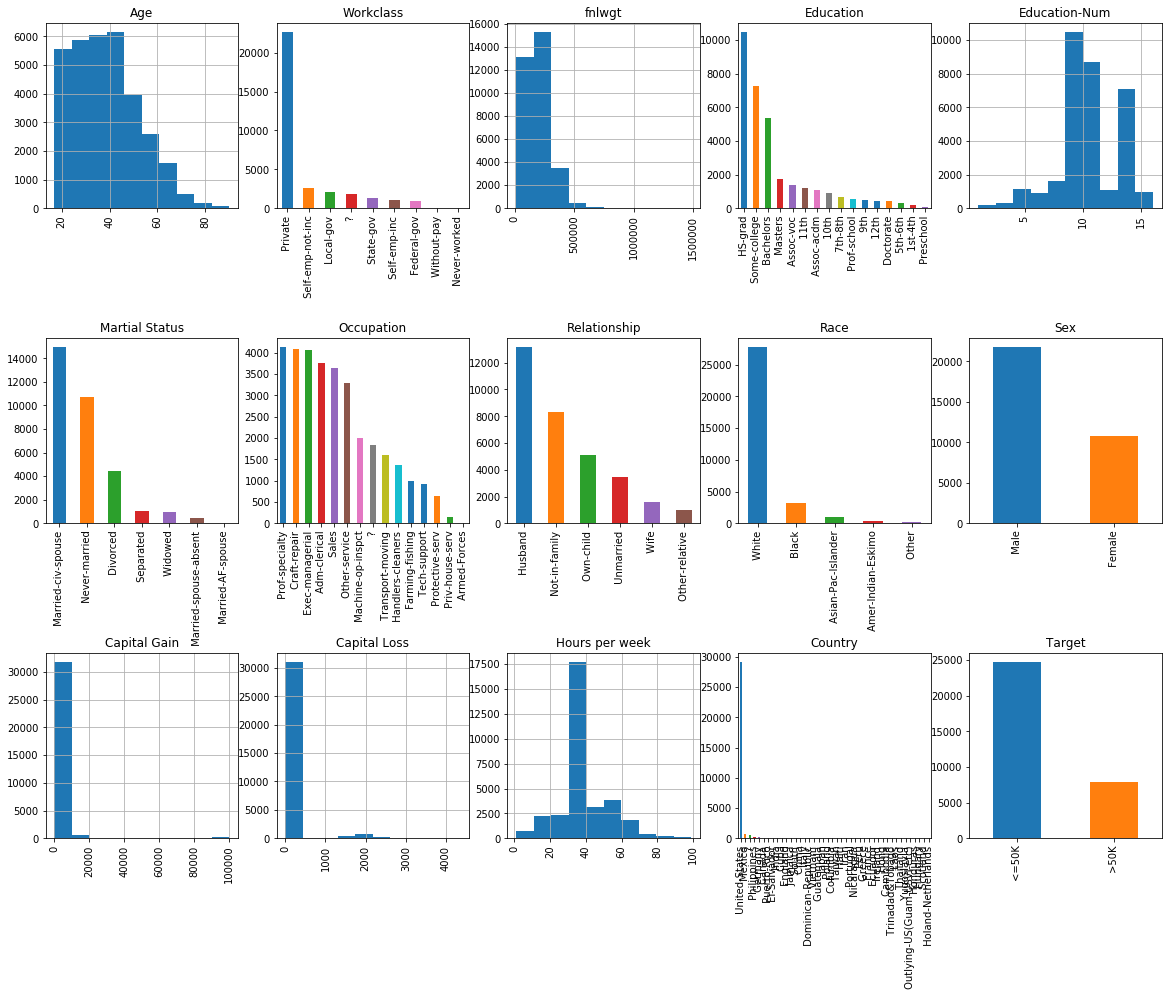

In [32]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(train_df.shape[1]) / cols)
for i, column in enumerate(train_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if train_df.dtypes[column] == np.object:
        train_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        train_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

# Data pre-process

In [33]:
train_df[["Education", "Education-Num"]].head(10)

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


In [34]:
test_df[["Education", "Education-Num"]].head(10)

,Education,Education-Num
0,11th,7
1,HS-grad,9
2,Assoc-acdm,12
3,Some-college,10
4,Some-college,10
5,10th,6
6,HS-grad,9
7,Prof-school,15
8,Some-college,10
9,7th-8th,4


## Drop 'Education'
Because 'Education' and 'Education-Num' are represented the same feature.

In [35]:
del train_df['Education']
del test_df['Education']

## Encode the categorical features as numbers

In [36]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            #encoders[column] = preprocessing.OneHotEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


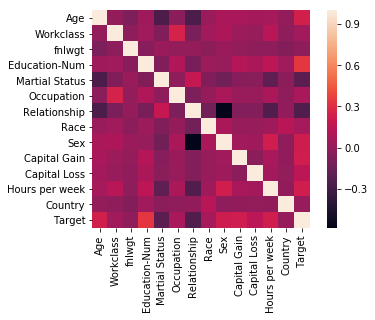

In [37]:
# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(train_df)
encoded_test, _ = number_encode_features(test_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [38]:
#import sklearn.cross_validation as cross_validation
data = encoded_data.drop(['Target'],axis=1,inplace=False)
label = encoded_data['Target']

X_train, X_valid, y_train, y_valid = train_test_split(data, label, train_size=0.70)   

X_test = encoded_test.drop(['Target'],axis=1,inplace=False)
y_test = encoded_test['Target']

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(22792, 13) (22792,)
(9769, 13) (9769,)
(16281, 13) (16281,)


/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Scaler

In [39]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = scaler.transform(X_valid)

/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/jeanneluo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Model Training

## Gaussian Naive Bayes

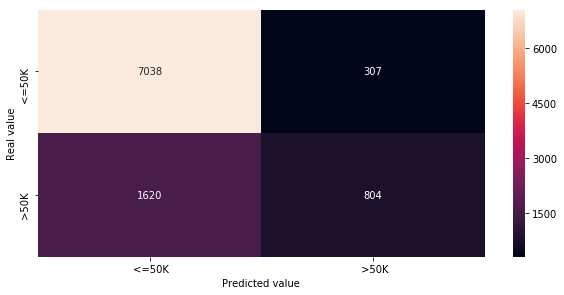

F1 score: 0.454880
The accuracy is 80.27%
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7345
           1       0.72      0.33      0.45      2424

   micro avg       0.80      0.80      0.80      9769
   macro avg       0.77      0.64      0.67      9769
weighted avg       0.79      0.80      0.77      9769



In [40]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

y_pred_gnb = clf_gnb.predict(X_valid)
cm_gnb = metrics.confusion_matrix(y_valid, y_pred_gnb)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_gnb, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

f1_gnb = metrics.f1_score(y_valid, y_pred_gnb)
print("F1 score: %f" % f1_gnb)
acc_gnb = np.mean(y_pred_gnb == y_valid)
print("The accuracy is {:.2f}%".format(100*acc_gnb))
print(classification_report(y_valid, y_pred_gnb))

## SVC

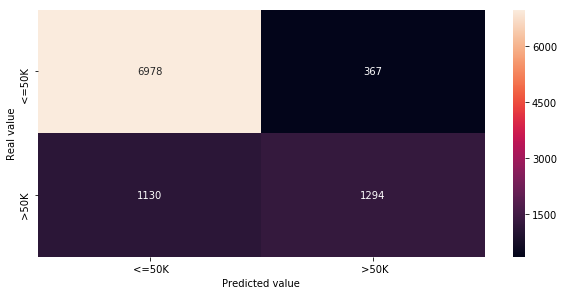

F1 score: 0.633537
The accuracy is 84.68%
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7345
           1       0.78      0.53      0.63      2424

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [41]:
# SVC - default setting

from sklearn.svm import SVC

clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train, y_train) 

y_pred_svc = clf_svc.predict(X_valid)
cm_svc = metrics.confusion_matrix(y_valid, y_pred_svc)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_svc, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

f1_svc = metrics.f1_score(y_valid, y_pred_svc)
print("F1 score: %f" % f1_svc)
acc_svc = np.mean(y_pred_svc == y_valid)
print("The accuracy is {:.2f}%".format(100*acc_svc))
print(classification_report(y_valid, y_pred_svc))

In [4]:
from sklearn.svm import SVC

clf_svm_poly = SVC(kernel='poly')
print(clf_svm_poly)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


## MLP classifier

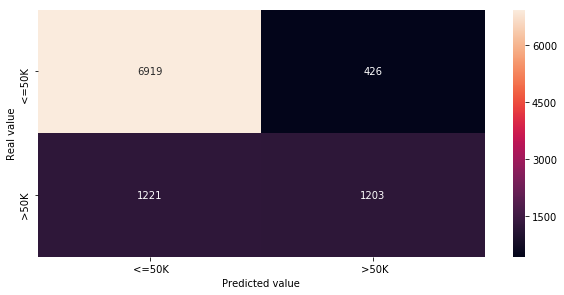

F1 score: 0.593634
The accuracy is 83.14%
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7345
           1       0.74      0.50      0.59      2424

   micro avg       0.83      0.83      0.83      9769
   macro avg       0.79      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769



In [42]:
# MLP

from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(solver='adam', alpha=1e-3,
                        hidden_layer_sizes=(3, 2), random_state=1)

clf_mlp.fit(X_train, y_train) 
y_pred_mlp = clf_mlp.predict(X_valid)
cm_mlp = metrics.confusion_matrix(y_valid, y_pred_mlp)

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=encoders["Target"].classes_, yticklabels=encoders["Target"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
plt.show()

f1_mlp = metrics.f1_score(y_valid, y_pred_mlp)
print("F1 score: %f" % f1_mlp)
acc_mlp = np.mean(y_pred_mlp == y_valid)
print("The accuracy is {:.2f}%".format(100*acc_mlp))
print(classification_report(y_valid, y_pred_mlp))